In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [5]:
file_path = r"C:\Users\Chara\OneDrive\Desktop\Global_Landslide_project\Global_Landslide_Catalog.xlsx"
df = pd.read_excel(file_path)

In [9]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count          

In [51]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
           event_id  event_time  fatality_count  injury_count  \
count  11033.000000         0.0     9648.000000   5359.000000   
mean    5598.953141         NaN        3.219424      0.751819   
std     3249.228647         NaN       59.886178      8.458955   
min        1.000000         NaN        0.000000      0.000000   
25%     2785.000000         NaN        0.000000      0.000000   
50%     5563.000000         NaN        0.000000      0.000000   
75%     8435.000000         NaN        1.000000      0.000000   
max    11221.000000         NaN     5000.000000    374.000000   

       event_import_id  admin_division_population  gazeteer_distance  \
count      9471.000000               9.471000e+03        9471.000000   
mean       4798.563070               1.577600e+05          11.873689   
std        2789.125559               8.297345e+05          15.598228   
min        -111.167300               0.000000e+00           0.000030   
25%        2386.500000

In [53]:
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
source_name                      0
source_link                    846
event_id                         0
event_date                       0
event_time                   11033
event_title                      0
event_description              862
location_description           102
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               69
fatality_count                1385
injury_count                  5674
storm_name                   10456
photo_link                    9537
notes                        10716
event_import_source           1563
event_import_id               1562
country_name                  1562
country_code                  1564
admin_division_name           1637
admin_division_population     1562
gazeteer_closest_point        1563
gazeteer_distance             1562
submitted_date                  10
created_date             

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

In [13]:
print(df.shape)

(11033, 31)


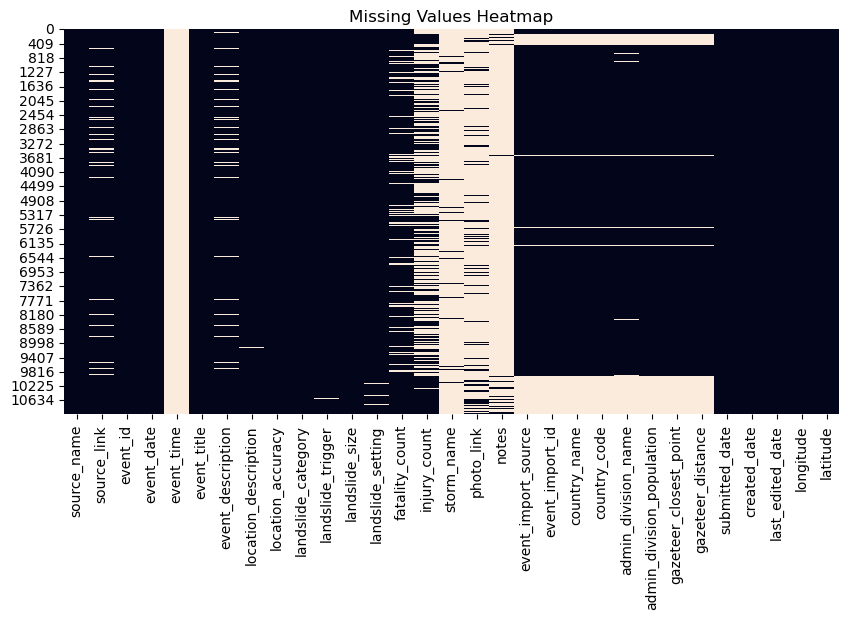

In [15]:
# Missing values heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

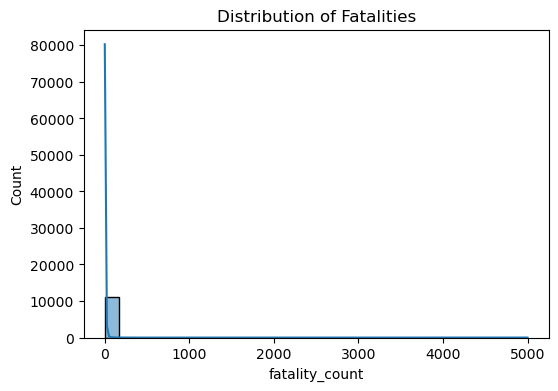

In [17]:
# Distribution of fatalities
plt.figure(figsize=(6,4))
sns.histplot(df["fatality_count"].fillna(0), bins=30, kde=True)
plt.title("Distribution of Fatalities")
plt.show()


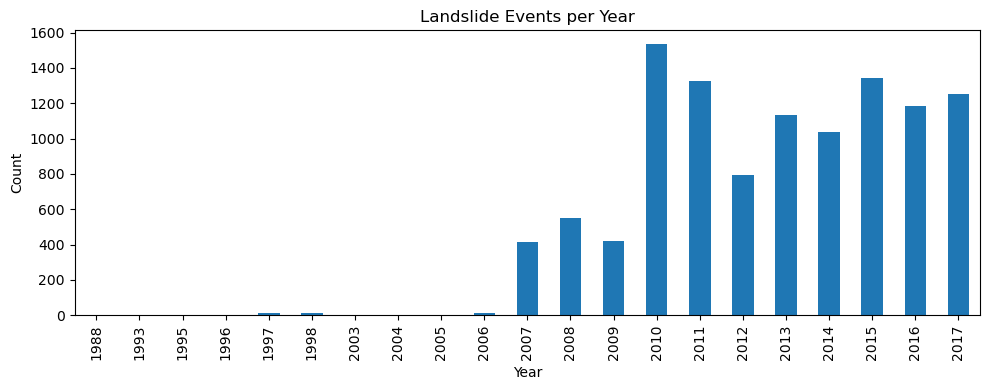

In [31]:
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_year'] = df['event_date'].dt.year
# Events per year
plt.figure(figsize=(10,4))
df["event_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Landslide Events per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

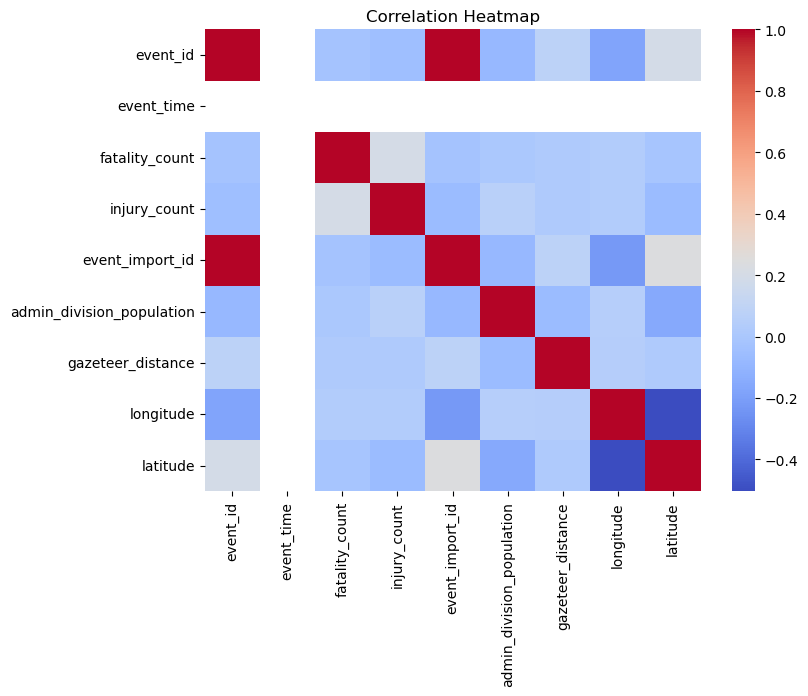

In [21]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

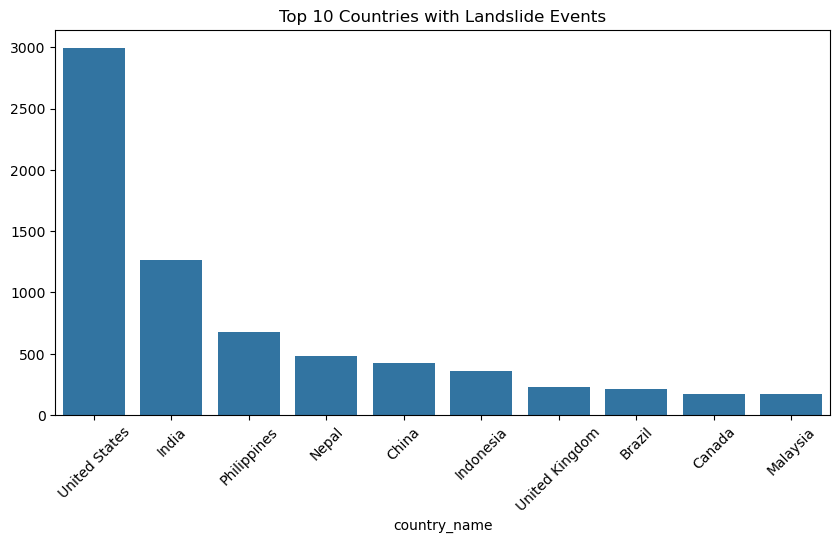

In [23]:
# Hotspots by country
top_countries = df["country_name"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Landslide Events")
plt.show()

In [37]:
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Extract year, month, and day into new columns.
df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_day'] = df['event_date'].dt.day

# Drop rows where date conversion might have failed
df.dropna(subset=['event_year', 'event_month', 'event_day'], inplace=True)
num_cols = ["latitude", "longitude", "event_year", "event_month", "event_day"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df['country_name'] = df['country_name'].fillna('Unknown')
country_freq = df["country_name"].value_counts(normalize=True).to_dict()
df["country_freq"] = df["country_name"].map(country_freq)
print("--- Data after All Transformations ---")
print(df[num_cols + ['country_freq']].head())

--- Data after All Transformations ---
   latitude  longitude  event_year  event_month  event_day  country_freq
0  0.327254   1.039897   -1.564576    -1.627303  -0.861906      0.038611
1  0.957088  -1.240621   -1.231969    -1.330233  -1.674111      0.271186
2 -1.813028  -0.771816   -1.897183    -1.627303   0.414416      0.005257
3  0.144797   0.784783   -1.231969     0.155118   1.806767      0.043596
4 -0.761643   1.202902   -0.899362     1.046329   0.066328      0.061180


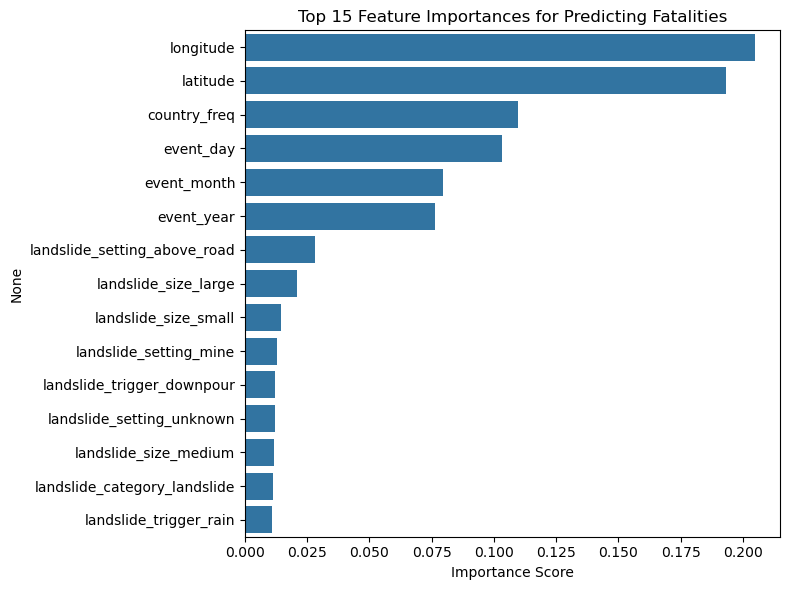

In [39]:
df['fatality_flag'] = np.where(df['fatality_count'].fillna(0) > 0, 1, 0)

# Create the date features
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_day'] = df['event_date'].dt.day

# Create the frequency-encoded country feature
df['country_name'] = df['country_name'].fillna('Unknown')
country_freq = df["country_name"].value_counts(normalize=True).to_dict()
df["country_freq"] = df["country_name"].map(country_freq)

# Drop any rows that might have missing dates after conversion
df.dropna(subset=['event_year', 'event_month', 'event_day'], inplace=True)

# Define the features (X) and the target (y)
features = ["latitude", "longitude", "event_year", "event_month", "event_day",
            "landslide_category", "landslide_trigger", "landslide_size",
            "landslide_setting", "country_freq"]

X = df[features].copy()
y = df["fatality_flag"].copy()

# Convert categorical columns to string type
for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype(str)

# Fill any remaining missing values
X = X.fillna(-999)

# One-hot encode the feature set
X_encoded = pd.get_dummies(X)


# --- 4. Train Model and Plot Feature Importance ---

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Feature Importances for Predicting Fatalities")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [41]:
import os
os.makedirs("outputs", exist_ok=True)
df.to_csv("outputs/glc_transformed.csv", index=False)
print("Transformed dataset saved at outputs/glc_transformed.csv")

Transformed dataset saved at outputs/glc_transformed.csv
